# **Proyecto 2 - Entrega 2

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

##  **1. Cargar Librerías**
##  **2. Cargar y Explorar los Datos**

---

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

df = pd.read_csv("train.csv")

# Ver estructura de los datos
display(df.head())
print(df.info())
print(df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


##  **3. Definir Conjuntos de Entrenamiento y Prueba**


In [4]:

X = df.drop(columns=["SalePrice"])  # Variables predictoras
y = df["SalePrice"]

# Convertir variables categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  **4. Árbol de Regresión para Predicción de Precios**


MAE Árbol de Regresión: 27263.49
RMSE Árbol de Regresión: 38836.67


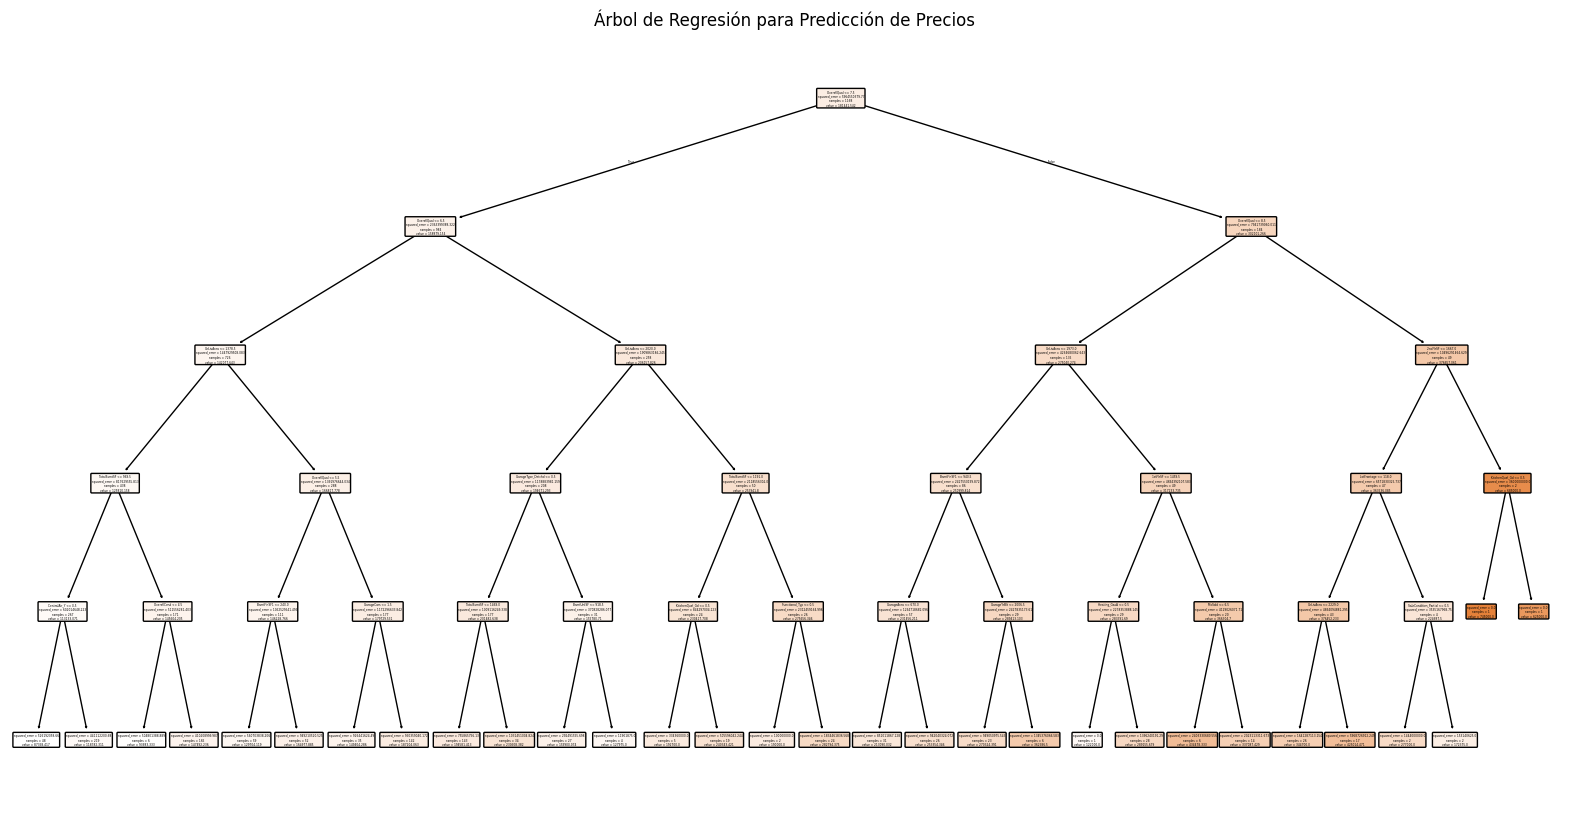

In [7]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

# Predicciones
y_pred = tree_regressor.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE Árbol de Regresión: {mae:.2f}")
print(f"RMSE Árbol de Regresión: {rmse:.2f}")

plt.figure(figsize=(20,10))
plot_tree(tree_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árbol de Regresión para Predicción de Precios")
plt.show()

##Interpretacion

El árbol de regresión mostrado representa la forma en que el modelo segmenta el conjunto de datos para hacer predicciones sobre el precio de las casas. Cada nodo en el árbol divide los datos en base a una variable que maximiza la reducción de la varianza, lo que significa que las casas con características similares se agrupan en ramas similares.

- La primera división se realiza con la variable que más influye en el precio de las casas

- Cada bifurcación representa una condición que separa los datos, y las hojas finales muestran los valores de predicción promedio.

- Los nodos más oscuros representan precios más altos, mientras que los más claros indican precios más bajos.

Si seguimos un camino desde la raíz hasta una hoja, podemos ver qué condiciones afectan el precio final de la casa.
Cuanto más profundo es el árbol, más divisiones se hacen, lo que permite una mejor precisión, pero también puede llevar a sobreajuste.
La variable que aparece en la raíz es la más influyente en la predicción del precio.

##  **5. Comparación con Otros Modelos (Distintas Profundidades)**


In [8]:
depths = [3, 7, 10]
errors = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    errors[depth] = mean_absolute_error(y_test, y_pred)
    print(f"MAE para profundidad {depth}: {errors[depth]:.2f}")

# Mejor profundidad
best_depth = min(errors, key=errors.get)
print(f"Mejor profundidad según MAE: {best_depth}")

MAE para profundidad 3: 29956.06
MAE para profundidad 7: 26100.87
MAE para profundidad 10: 26221.76
Mejor profundidad según MAE: 7


**Visualización de los Errores en Diferentes Profundidades**

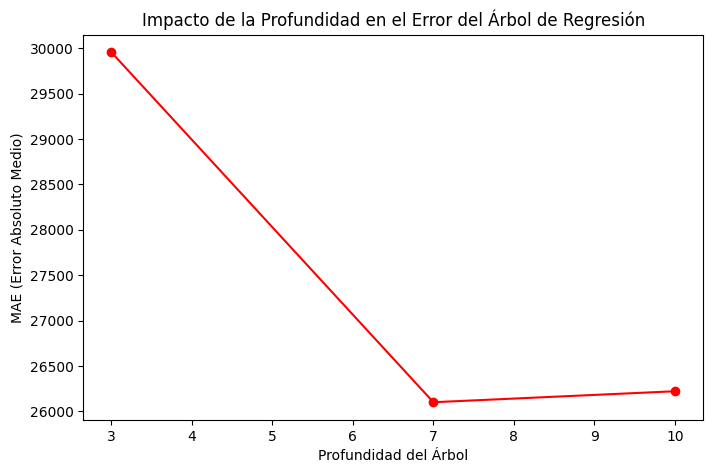

In [9]:
plt.figure(figsize=(8,5))
plt.plot(errors.keys(), errors.values(), marker='o', linestyle='-', color='red')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("MAE (Error Absoluto Medio)")
plt.title("Impacto de la Profundidad en el Error del Árbol de Regresión")
plt.show()

El gráfico muestra cómo el MAE (Error Absoluto Medio) varía con la profundidad del árbol. Podemos observar lo siguiente:

Para profundidad 3, el error es bastante alto (~30,000).
A medida que la profundidad aumenta (hasta 7), el error disminuye significativamente, alcanzando su punto más bajo.
Para profundidad 10, el error comienza a estabilizarse e incluso aumenta ligeramente, lo que sugiere un posible sobreajuste.

El mejor modelo es el que tiene una profundidad de 7, ya que presenta el menor MAE sin caer en un sobreajuste significativo.

Este resultado indica que un árbol demasiado simple (profundidad 3) no captura suficientes patrones en los datos, mientras que un árbol demasiado profundo (profundidad 10) comienza a sobreajustarse a los datos de entrenamiento. Por lo tanto, la profundidad óptima es 7.

##  **6. Comparación con Regresión Lineal**

MAE Regresión Lineal: 20493.24
RMSE Regresión Lineal: 49286.51


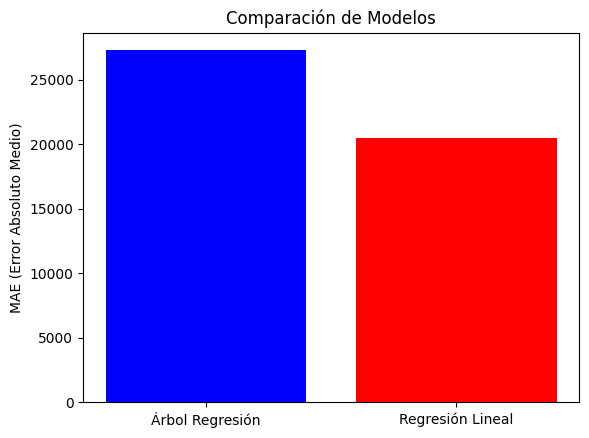

In [16]:
# Manejar valores faltantes rellenando con la media
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Entrenar modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluación
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"MAE Regresión Lineal: {mae_linear:.2f}")
print(f"RMSE Regresión Lineal: {rmse_linear:.2f}")

plt.bar(["Árbol Regresión", "Regresión Lineal"], [mae, mae_linear], color=["blue", "red"])
plt.ylabel("MAE (Error Absoluto Medio)")
plt.title("Comparación de Modelos")
plt.show()


¿Cuál modelo lo hizo mejor?
Analizando los resultados de la comparación entre el Árbol de Regresión y la Regresión Lineal, observamos los siguientes errores:

- MAE Árbol de Regresión: 26,221.76
- MAE Regresión Lineal: 20,493.24
- RMSE Regresión Lineal: 49,286.51


- El MAE (Error Absoluto Medio) es más bajo en la Regresión Lineal, lo que indica que, en promedio, las predicciones están más cerca de los valores reales en comparación con el Árbol de Regresión.
- El RMSE de la Regresión Lineal es muy alto, lo que sugiere que hay algunas predicciones con errores muy grandes, lo cual puede significar que el modelo no maneja bien ciertos valores atípicos.
- El Árbol de Regresión tiene un MAE mayor, lo que sugiere que en general sus predicciones son menos precisas, pero es posible que maneje mejor las relaciones no lineales entre las variables.


Si nos enfocamos en MAE, la Regresión Lineal parece ser mejor, ya que tiene menor error absoluto medio.
Sin embargo, el alto RMSE de la Regresión Lineal sugiere que puede estar fallando con algunos valores extremos.
Si el dataset tiene muchas relaciones no lineales, es probable que el Árbol de Regresión sea una mejor opción en ciertos casos.

¿Cuál modelo usar?

Si queremos predicciones generales más precisas en promedio, la Regresión Lineal es la mejor opción.
Si queremos manejar mejor relaciones complejas y no lineales en los datos, el Árbol de Regresión puede ser más adecuado.

## **7. Clasificación de Casas en Económicas, Intermedias y Caras**

PriceCategory
Cara          497
Económica     483
Intermedia    480
Name: count, dtype: int64


<ipython-input-18-9adb3684669a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["PriceCategory"], palette="viridis")


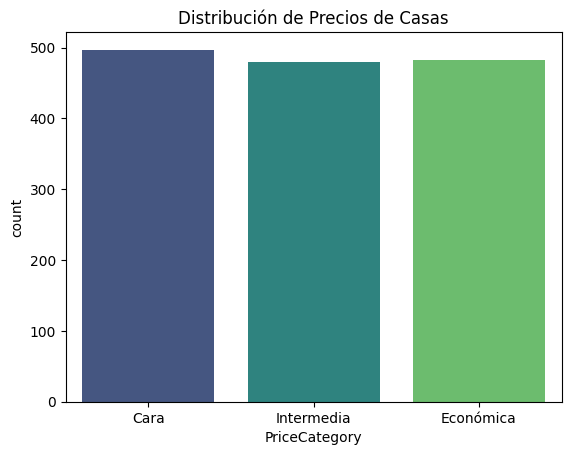

In [18]:
q1 = y.quantile(0.33)
q2 = y.quantile(0.66)

def categorize_price(price):
    if price <= q1:
        return "Económica"
    elif price <= q2:
        return "Intermedia"
    else:
        return "Cara"

df["PriceCategory"] = df["SalePrice"].apply(categorize_price)
print(df["PriceCategory"].value_counts())

sns.countplot(x=df["PriceCategory"], palette="viridis")
plt.title("Distribución de Precios de Casas")
plt.show()

##  **8. Árbol de Clasificación para Categorías de Precios**

Precisión del Árbol de Clasificación: 79.11%


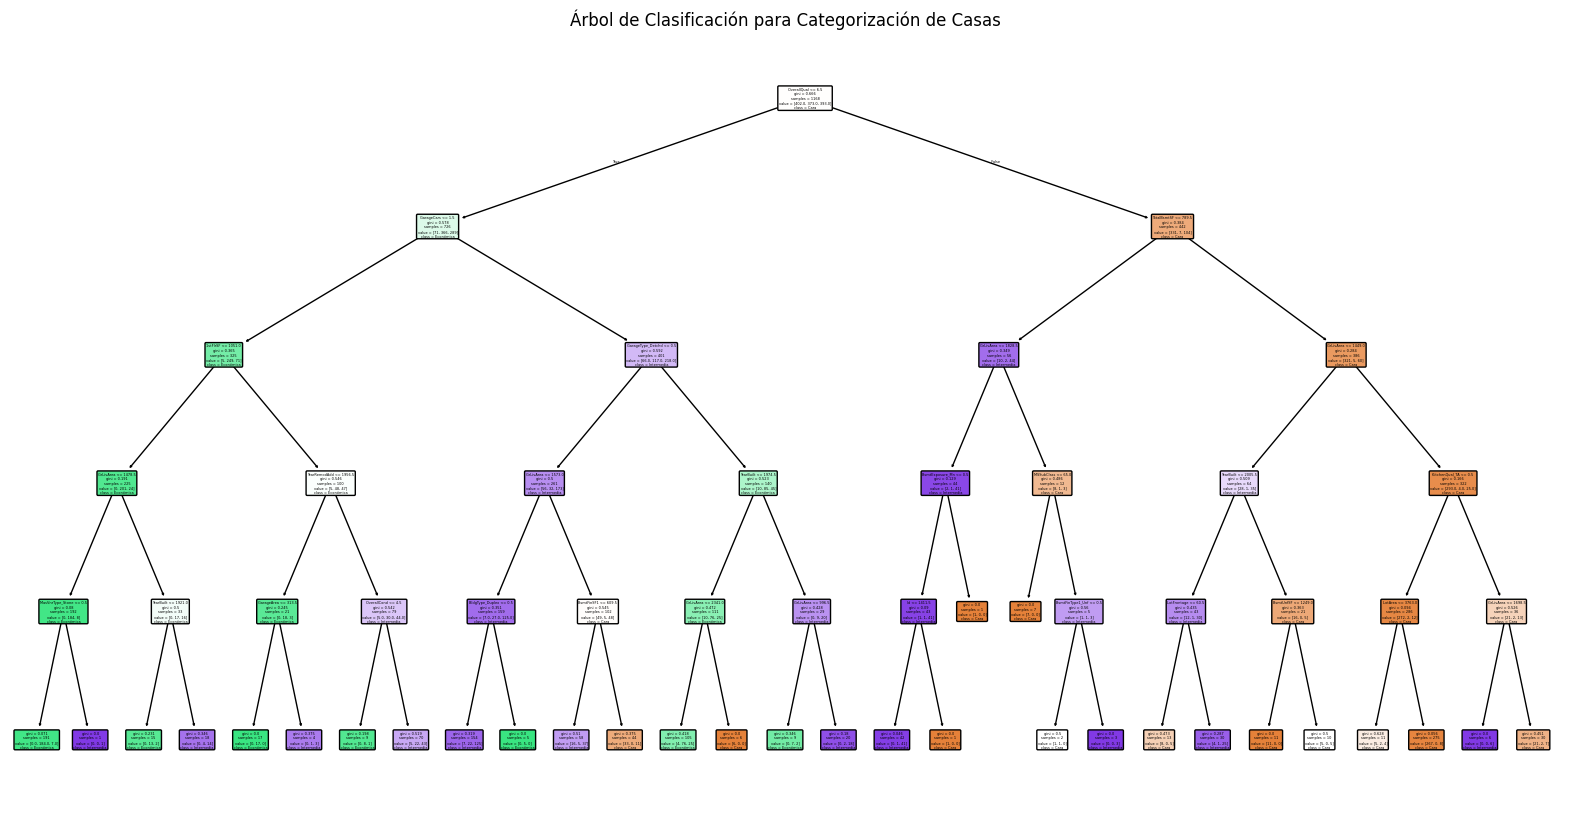

In [20]:
X_class = df.drop(columns=["SalePrice", "PriceCategory"])
y_class = df["PriceCategory"]

X_class = pd.get_dummies(X_class, drop_first=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_classifier.fit(X_train_class, y_train_class)

y_pred_class = tree_classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Precisión del Árbol de Clasificación: {accuracy:.2%}")

plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True, feature_names=X_class.columns, class_names=tree_classifier.classes_, rounded=True)
plt.title("Árbol de Clasificación para Categorización de Casas")
plt.show()

El árbol de clasificación segmenta las casas en función de sus características más relevantes para determinar su categoría de precio.

- Raíz del Árbol: La variable más importante aparece en el primer nodo, ya que es la que más contribuye a la clasificación de las casas en sus respectivas categorías.

- Ramas y Niveles: Cada bifurcación representa una decisión basada en una característica de la casa, separando los datos en función de los valores de esa variable.

- Hojas: Los nodos finales representan la clasificación en Económica, Intermedia o Cara, dependiendo de los valores de las características evaluadas en el camino del árbol.

Colores:
- Casas económicas están representadas en verde.
- Casas intermedias en morado.
- Casas caras en naranja.

 ¿Cómo interpretar el modelo?

Si seguimos cualquier camino desde la raíz hasta una hoja, podemos entender cómo el modelo clasifica una casa en una de las tres categorías.
Cuanto más profundo sea el árbol, más específico será el modelo, pero un árbol muy grande puede llevar a sobreajuste.
Las variables más cercanas a la raíz son las que tienen mayor impacto en la clasificación.